Fluent syntax is the most `flexible` and `fundamental`.

### Chaining Query Operators

In [ ]:
string[] names = { "Tom", "Dick", "Harry", "Mary", "Jay" };
IEnumerable<string> query = names
    .Where (n => n.Contains ("a"))
    .OrderBy (n => n.Length)
    .Select (n => n.ToUpper());

In [ ]:
public static IEnumerable<TSource> Where<TSource>
(this IEnumerable<TSource> source, Func<TSource,bool> predicate)
{
    foreach (TSource element in source)
        if (predicate (element))
            yield return element;
}

public static IEnumerable<TSource> OrderBy<TSource,TKey>
    (this IEnumerable<TSource> source, Func<TSource,TKey> keySelector) 
{
    var newSource = source; //sort source method
    
    foreach (TSource element in newSource)
        yield return element;
}

public static IEnumerable<TResult> Select<TSource,TResult>
    (this IEnumerable<TSource> source, Func<TSource,TResult> selector) 
{
    foreach (var item in source) 
        yield return selector(item);
}

`Where`, `OrderBy`, and `Select` are `standard query operators`

`Data flows` from `left to right` through the chain of operators

> A query operator `never alters` the input sequence; instead, it returns a `new sequence`. This is consistent with the **functional programming** paradigm from which LINQ was inspired.

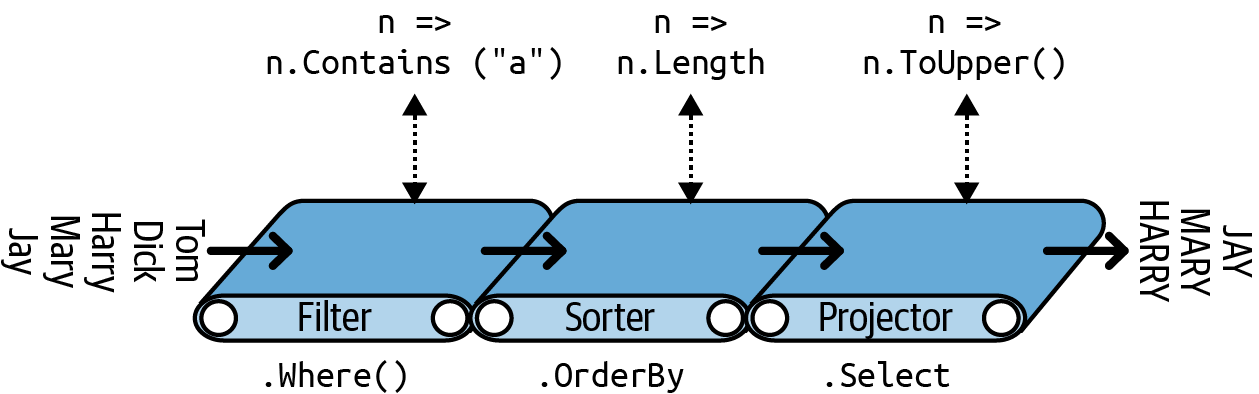

### Composing Lambda Expressions

A lambda expression in a query operator always works on `individual elements` in the input sequence—`not the sequence as a whole`.

In [ ]:
public static IEnumerable<TSource> Where<TSource>
(this IEnumerable<TSource> source, Func<TSource,bool> predicate)
{
    foreach (TSource element in source)
        if (predicate (element))
            yield return element;
}

#### Lambda expressions and Func signatures

The standard query operators utilize generic `Func` delegates.

`Func<TSource,bool>` matches a TSource=>bool lambda expression: one that
accepts a `TSource argument` and **returns** a `bool` value.

In [ ]:
string[] names = { "alireza", "ardalan", "ehsan" };

var intResult = names.Select(TestSelector);

var stringResult = names.Select(s => s + "test");

public int TestSelector(string input)
{
    return 1;
}

public string TestStringFunciton(string s)
{
    return s + "test";
}

#### Lambda expressions and element typing

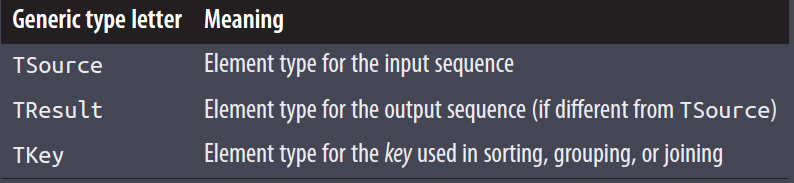

`TSource` is ***determined by*** the `input sequence`. `TResult` and `TKey` are typically ***inferred from*** your `lambda expression`.

In [ ]:
public static IEnumerable<TResult> Select<TSource,TResult>
(this IEnumerable<TSource> source, Func<TSource,TResult> selector){}

In [ ]:
string[] names = { "Tom", "Dick", "Harry", "Mary", "Jay" };
IEnumerable<int> query = names.Select (n => n.Length);

foreach (int length in query)
    Console.Write (length + "|"); // 3|4|5|4|3|

In [ ]:
public static IEnumerable<TSource> Where<TSource>
(this IEnumerable<TSource> source, Func<TSource,bool> predicate)

In [ ]:
public static IEnumerable<TSource> OrderBy<TSource,TKey>
(this IEnumerable<TSource> source, Func<TSource,TKey> keySelector)

### Natural Ordering

The ***original ordering*** of elements within an input sequence is significant in LINQ. Some query operators rely on this ordering, such as `Take`, `Skip`, and `Reverse`.

In [ ]:
//The Take operator outputs the first x elements, discarding the rest:
int[] numbers = { 10, 9, 8, 7, 6 };
IEnumerable<int> firstThree = numbers.Take (3); // { 10, 9, 8 }

//The Skip operator ignores the first x elements and outputs the rest:
IEnumerable<int> lastTwo = numbers.Skip (3); // { 7, 6 }

//Reverse does exactly as it says:
IEnumerable<int> reversed = numbers.Reverse(); // { 6, 7, 8, 9, 10 }

With ***local queries (LINQ-to-objects)***, operators such as `Where` and `Select` ***preserve*** the original ordering of the input sequence (as do all other query operators, except
for those that specifically change the ordering).

#### Other Operators

In [ ]:
int[] numbers = { 10, 9, 8, 7, 6 };

//element operators
int firstNumber = numbers.First(); // 10
int lastNumber = numbers.Last(); // 6
int secondNumber = numbers.ElementAt(1); // 9
int secondLowest = numbers.OrderBy(n=>n).Skip(1).First(); // 7

//aggregation operators
int count = numbers.Count(); // 5;
int min = numbers.Min(); // 6;

//quantifiers
bool hasTheNumberNine = numbers.Contains (9); // true
bool hasMoreThanZeroElements = numbers.Any(); // true
bool hasAnOddElement = numbers.Any (n => n % 2 != 0); // true

int[] seq1 = { 1, 2, 3 };
int[] seq2 = { 3, 4, 5 };
IEnumerable<int> concat = seq1.Concat (seq2); // { 1, 2, 3, 3, 4, 5 }
IEnumerable<int> union = seq1.Union (seq2); // { 1, 2, 3, 4, 5 }